In [ ]:
# Finding the minimum value of function f(x,y)= (x-3)^2 + (y-2)^2 + cos(3x) + sin(3y) using PSO

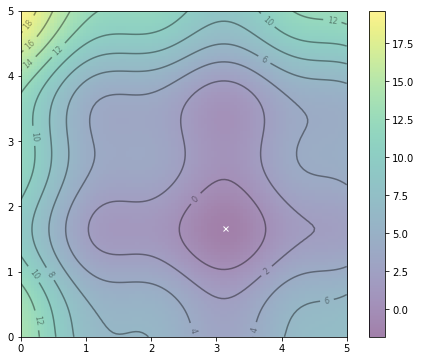

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def f(x,y):
    return (x-3)**2 + (y-2)**2 + np.cos(3*x) + np.sin(3*y)
 
# Contour plot: With the global minimum showed as "X" on the plot
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

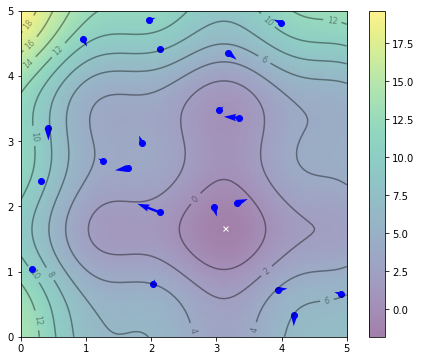

In [20]:
n_particles = 20
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) *0.1

# plot
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
# Plot the points X as blue dots
plt.scatter(X[0], X[1], c='blue', marker='o', label='Particles')
# Plot the velocities V as blue arrows
plt.quiver(X[0], X[1], V[0], V[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Velocities')
plt.show()

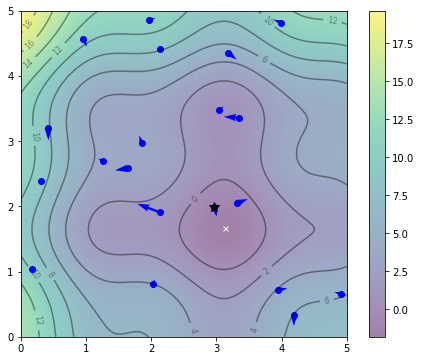

In [21]:
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

# Plot
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.scatter(X[0], X[1], c='blue', marker='o', label='Particles')
plt.quiver(X[0], X[1], V[0], V[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Velocities')

# Plot gbest_obj
plt.plot([gbest[0]], [gbest[1]], marker='*', markersize=10, color='black', label='Global Best')
plt.show()

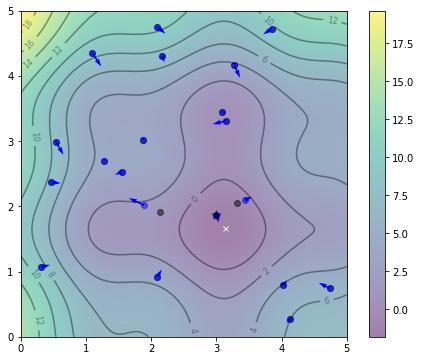

In [22]:
c1 = c2 = 0.1
w = 0.8

# One iteration
r = np.random.rand(2)
# update V
V = w * V + c1*r[0]*(pbest - X) + c2*r[1]*(gbest.reshape(-1,1)-X)
# update X
X = X + V
obj = f(X[0], X[1])
pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
pbest_obj = np.array([pbest_obj, obj]).max(axis=0)
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

# plot
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = plt.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = plt.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = plt.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)

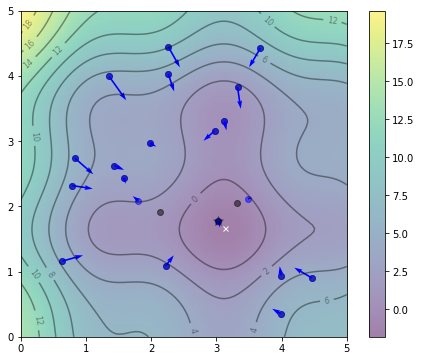

In [23]:
c1 = c2 = 0.1
w = 0.8

# One iteration
r = np.random.rand(2)
# update V
V = w * V + c1*r[0]*(pbest - X) + c2*r[1]*(gbest.reshape(-1,1)-X)
# update X
X = X + V
obj = f(X[0], X[1])
pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
pbest_obj = np.array([pbest_obj, obj]).max(axis=0)
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

# plot
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = plt.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = plt.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = plt.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)

PSO found best solution at f([3.11592693 1.64925132])=-1.8330027860569
Global optimal at f([3.131313131313131, 1.6666666666666667])=-1.8300945541782478


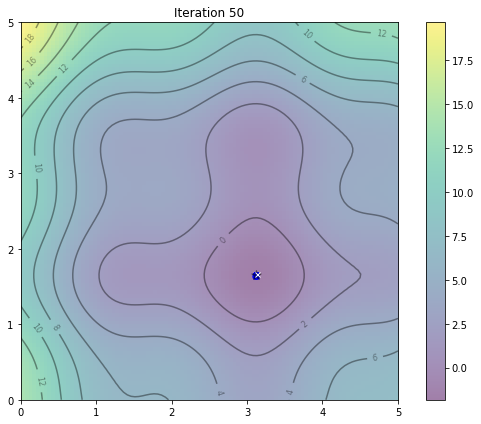

In [27]:
# Running for 50 iterations

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective function
def f(x,y):
    return (x-3)**2 + (y-2)**2 + np.cos(3*x) + np.sin(3*y)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

# Function for one iteration of particle swarm optimization
def update():
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

    
# Set up the contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

# Steps of PSO: algorithm update and show in plot
def animate(i):
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,51)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="pillow")
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))